In [1]:
# Import des bibliothèques de manipulation et visualisation
import pandas as pd  # Permet de manipuler des tableaux de données (DataFrames) et de lire des fichiers CSV ou Excel.

import \
    numpy as np  # Offre des outils mathématiques performants pour gérer les calculs sur des tableaux numériques et des matrices.

import matplotlib.pyplot as plt  # Bibliothèque de base pour créer des graphiques et des visualisations statiques en 2D.

import \
    seaborn as sns  # Extension de matplotlib facilitant la création de graphiques statistiques plus esthétiques et complexes.

#Préparation des données

from sklearn.model_selection import \
    train_test_split  # Fournit une fonction pour diviser automatiquement votre jeu de données en un ensemble d'entraînement et un ensemble de test.

#Mesures de performance (Métriques)

from sklearn.metrics import \
    accuracy_score  # Importe la fonction pour calculer le taux global de bonnes réponses (exactitude).

from sklearn.metrics import \
    recall_score  # Importe la fonction pour mesurer le rappel (capacité à détecter tous les cas positifs).

from sklearn.metrics import \
    f1_score  # Importe la fonction pour calculer le score F1, l'équilibre entre précision et rappel.

from sklearn.metrics import \
    precision_score  # Importe la fonction pour mesurer la précision (fiabilité des prédictions positives).

from sklearn.metrics import \
    balanced_accuracy_score  # Importe la fonction pour calculer l'exactitude équilibrée, utile si vos classes ne sont pas de taille égale.

from sklearn.metrics import \
    matthews_corrcoef  # Importe le coefficient de Matthews, une mesure de qualité très fiable même sur des données déséquilibrées.

from sklearn.metrics import \
    classification_report  # Importe l'outil qui génère un rapport texte complet avec les principales métriques pour chaque classe.

#Algorithme de calcul (XGBoost)
from xgboost import \
    XGBClassifier  # Importe spécifiquement la classe pour créer un modèle de classification utilisant l'algorithme de Boosting de Gradient.

import \
    xgboost as xgb  # Importe l'intégralité de la bibliothèque XGBoost pour pouvoir utiliser ses fonctionnalités plus techniques et ses formats de données propres.



In [2]:
# Chargement du fichier CSV
df = pd.read_csv("transactions.csv")
print(f"Fichier chargé avec succès ! Le tableau contient {df.shape[0]} lignes et {df.shape[1]} colonnes.") # Affiche une confirmation textuelle avec les dimensions exactes du DataFrame.
print(df.head()) # Affiche les 5 premières lignes pour vérifier que les données et les colonnes sont correctement alignées.


Fichier chargé avec succès ! Le tableau contient 299695 lignes et 17 colonnes.
   transaction_id  user_id  account_age_days  total_transactions_user  \
0               1        1               141                       47   
1               2        1               141                       47   
2               3        1               141                       47   
3               4        1               141                       47   
4               5        1               141                       47   

   avg_amount_user  amount country bin_country channel merchant_category  \
0           147.93   84.75      FR          FR     web            travel   
1           147.93  107.90      FR          FR     web            travel   
2           147.93   92.36      FR          FR     app            travel   
3           147.93  112.47      FR          FR     web           fashion   
4           147.93  132.91      FR          US     web       electronics   

   promo_used  avs_match 

In [3]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
299690,299691,6000,996,45,27.93,34.07,ES,ES,web,grocery,0,1,1,0,2024-09-29T04:40:54Z,218.55,0
299691,299692,6000,996,45,27.93,68.56,ES,ES,app,travel,0,1,1,1,2024-10-03T08:49:02Z,185.55,0
299692,299693,6000,996,45,27.93,25.02,ES,ES,app,fashion,0,1,1,1,2024-10-26T07:40:38Z,33.50,0
299693,299694,6000,996,45,27.93,23.92,ES,ES,web,gaming,0,0,0,0,2024-10-27T09:31:56Z,71.75,0
299694,299695,6000,996,45,27.93,26.07,ES,ES,web,gaming,1,1,1,1,2024-10-30T11:10:23Z,355.83,0


## Résumé structurel du dataset

Le dataset contient **299 695 transactions** et **17 variables**, sans valeurs manquantes.
La structure est cohérente et directement exploitable pour une analyse exploratoire avancée et la modélisation.

---

### Dimensions
- **Nombre de lignes** : 299 695
- **Nombre de colonnes** : 17
- **Mémoire utilisée** : ~38,9 MB
- **Index** : `RangeIndex` (0 à 299 694)

---

### Répartition des types de variables
- **Variables numériques continues (`float64`)** : 3
- **Variables numériques discrètes / binaires (`int64`)** : 9
- **Variables catégorielles (`object`)** : 5

---

### Détail des colonnes par type

#### Identifiants
- **transaction_id** (`int64`) : identifiant unique de la transaction
- **user_id** (`int64`) : identifiant utilisateur

#### Variables numériques continues
- **avg_amount_user** (`float64`) : montant moyen des transactions de l’utilisateur
- **amount** (`float64`) : montant de la transaction
- **shipping_distance_km** (`float64`) : distance géographique de livraison

#### Variables numériques discrètes / binaires
- **account_age_days** (`int64`) : ancienneté du compte en jours
- **total_transactions_user** (`int64`) : nombre total de transactions utilisateur
- **promo_used** (`int64`) : utilisation d’un code promotionnel (0/1)
- **avs_match** (`int64`) : correspondance AVS (0/1)
- **cvv_result** (`int64`) : validation CVV (0/1)
- **three_ds_flag** (`int64`) : authentification 3D Secure (0/1)
- **is_fraud** (`int64`) : variable cible (0 = légitime, 1 = fraude)

#### Variables catégorielles
- **country** (`object`) : pays de l’utilisateur
- **bin_country** (`object`) : pays du BIN de la carte bancaire
- **channel** (`object`) : canal de paiement (web, app, etc.)
- **merchant_category** (`object`) : catégorie du commerçant
- **transaction_time** (`object`) : date et heure de la transaction (UTC)

---

### Qualité des données
- **Valeurs manquantes** : aucune
- **Types cohérents** avec une problématique de détection de fraude
- **Variable temporelle** à convertir en `datetime` pour extraction de features (heure, jour, cyclicité)

---

### Lecture métier initiale
Le dataset combine :
- des **signaux comportementaux utilisateur**,
- des **informations transactionnelles**,
- des **indicateurs de sécurité**,
- des **éléments géographiques et temporels**.

Il est bien adapté à une **approche de classification binaire déséquilibrée**, avec un fort potentiel de **feature engineering** et d’**interprétabilité via SHAP**.


In [4]:
df.isna().sum().sort_values(ascending=False)
df.isna().mean().sort_values(ascending=False)

transaction_id             0.0
user_id                    0.0
account_age_days           0.0
total_transactions_user    0.0
avg_amount_user            0.0
amount                     0.0
country                    0.0
bin_country                0.0
channel                    0.0
merchant_category          0.0
promo_used                 0.0
avs_match                  0.0
cvv_result                 0.0
three_ds_flag              0.0
transaction_time           0.0
shipping_distance_km       0.0
is_fraud                   0.0
dtype: float64

In [5]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='is_fraud', ylabel='count'>

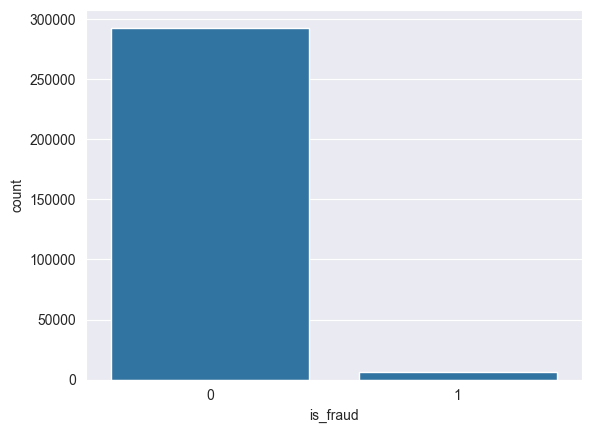

In [6]:
import seaborn as sns
sns.countplot(data=df, x="is_fraud")

La variable cible `is_fraud` est fortement déséquilibrée, avec environ 97,8 % de transactions non frauduleuses contre 2,2 % de fraudes.
Ce déséquilibre de classes nécessite l’usage de métriques adaptées (recall, F1, ROC-AUC) et de techniques spécifiques pour l’entraînement des modèles.

In [7]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_cols, cat_cols


(Index(['transaction_id', 'user_id', 'account_age_days',
        'total_transactions_user', 'avg_amount_user', 'amount', 'promo_used',
        'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km',
        'is_fraud'],
       dtype='object'),
 Index(['country', 'bin_country', 'channel', 'merchant_category',
        'transaction_time'],
       dtype='object'))

Le dataset est composé de variables numériques et binaires (identifiants, montants, signaux de sécurité, distance, cible `is_fraud`) ainsi que de variables catégorielles et temporelles (pays, canal, catégorie marchand, temps).
Cette séparation implique des traitements distincts en preprocessing, notamment l’encodage des variables catégorielles et la transformation de la variable temporelle avant la modélisation.


In [8]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,299695.0,149848.000000,86514.638800,1.00,74924.50,149848.00,224771.50,299695.00
user_id,299695.0,3002.559432,1732.309663,1.00,1501.00,3007.00,4504.00,6000.00
account_age_days,299695.0,973.397871,525.241409,1.00,516.00,975.00,1425.00,1890.00
total_transactions_user,299695.0,50.673321,5.976391,40.00,46.00,51.00,56.00,60.00
avg_amount_user,299695.0,148.142973,200.364624,3.52,46.19,90.13,173.45,4565.29
amount,299695.0,177.165279,306.926507,1.00,42.10,89.99,191.11,16994.74
promo_used,299695.0,0.153640,0.360603,0.00,0.00,0.00,0.00,1.00
avs_match,299695.0,0.837999,0.368453,0.00,1.00,1.00,1.00,1.00
cvv_result,299695.0,0.872110,0.333968,0.00,1.00,1.00,1.00,1.00
three_ds_flag,299695.0,0.784588,0.411109,0.00,1.00,1.00,1.00,1.00


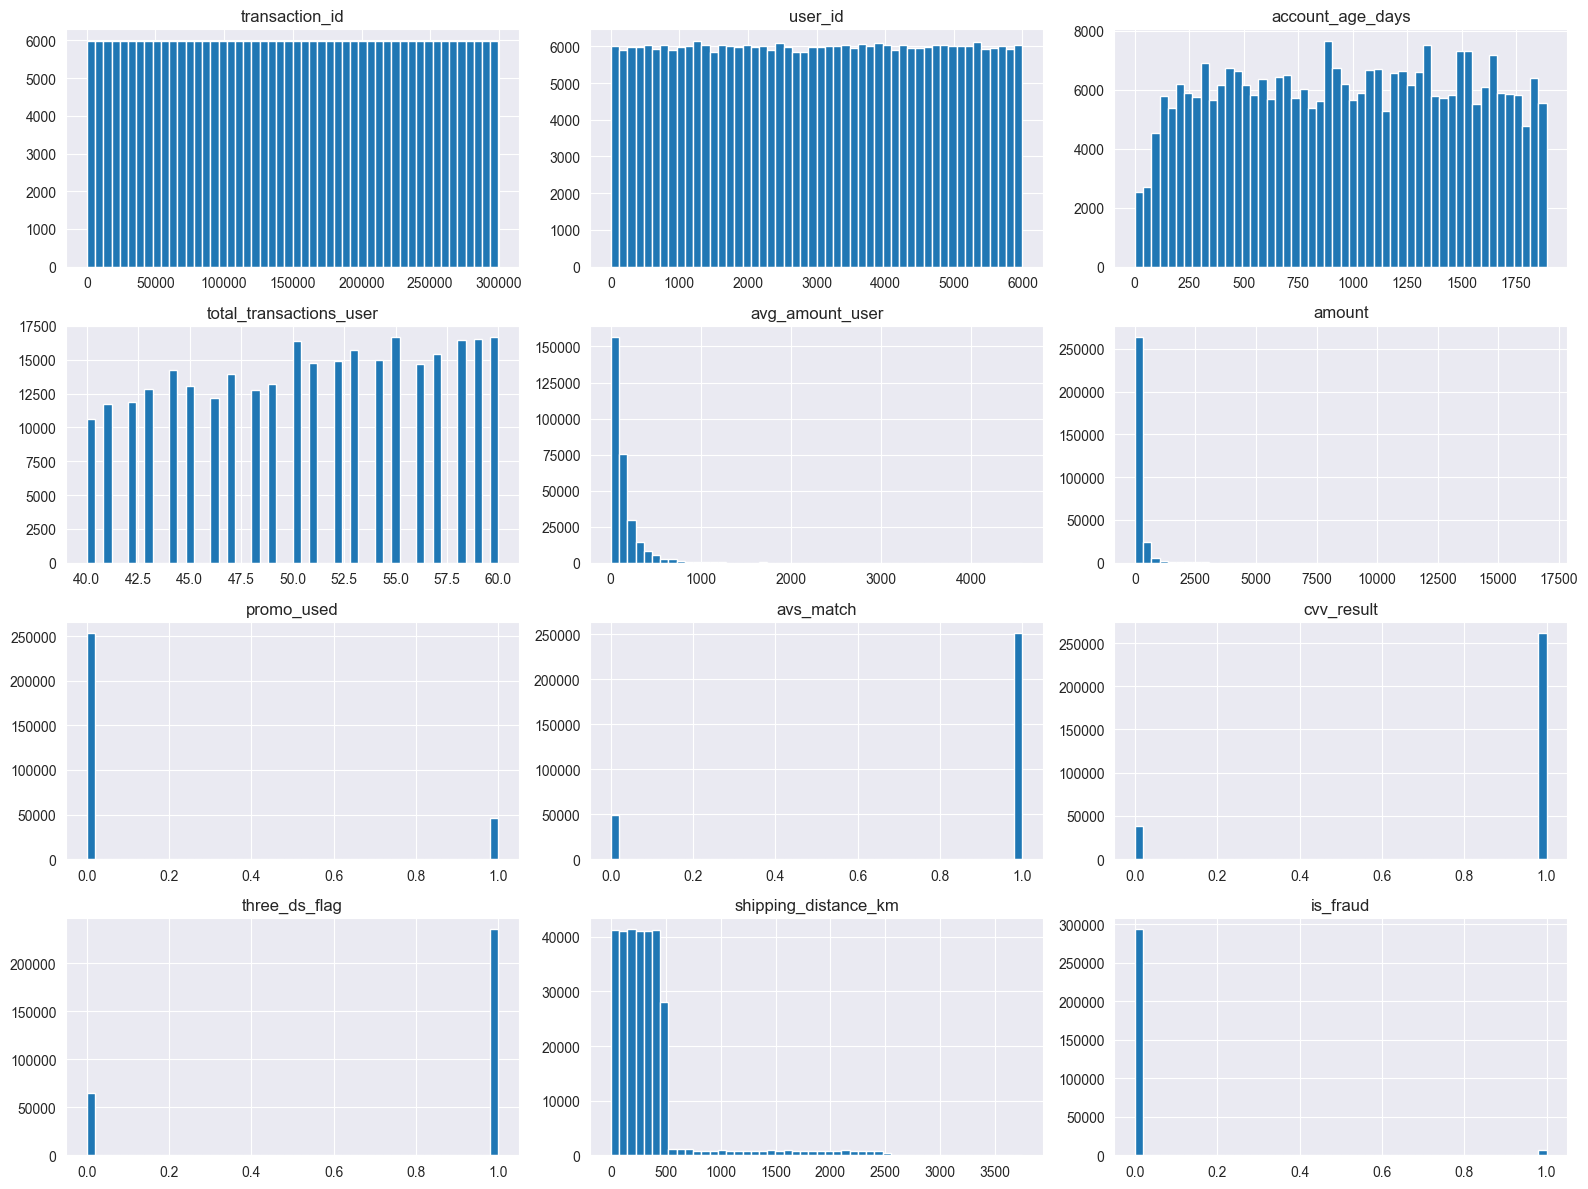

In [9]:
df[num_cols].hist(figsize=(16,12), bins=50)
plt.tight_layout()

Les distributions montrent des variables continues très asymétriques (amount, avg_amount_user, shipping_distance_km) avec des valeurs extrêmes, tandis que les variables binaires (promo_used, avs_match, cvv_result, three_ds_flag, is_fraud) sont fortement déséquilibrées.
Nécessitant normalisation, gestion des outliers et une attention particulière au déséquilibre de la cible.

<Axes: >

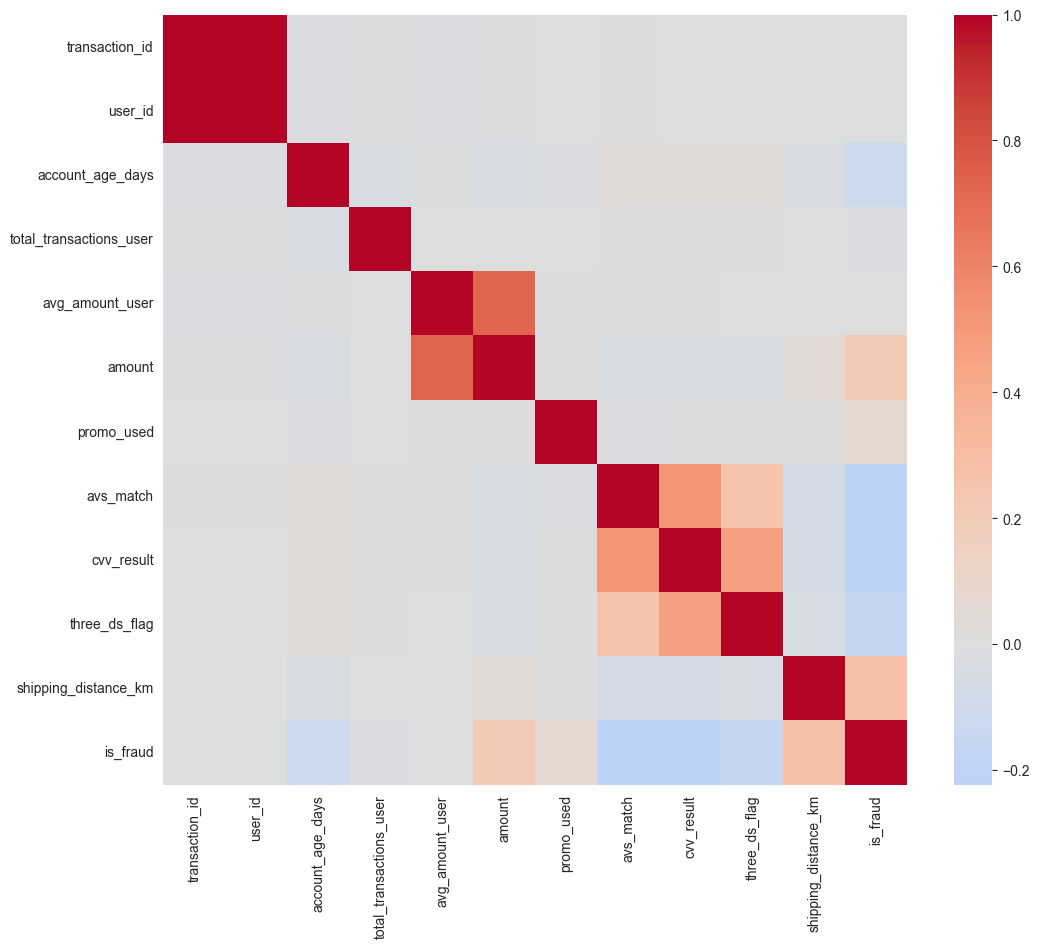

In [10]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)

## Début du Feature Engineering

Les analyses exploratoires mettent en évidence des distributions asymétriques, des valeurs extrêmes et un fort déséquilibre de la variable cible, ce qui justifie la création de nouvelles variables plus informatives.
Le feature engineering vise ici à transformer les signaux bruts (montants, comportements utilisateurs, contrôles de sécurité, distance) en indicateurs comportementaux et contextuels mieux adaptés à la détection de fraude.


In [11]:
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
# Conversion de la colonne 'transaction_time' au format datetime afin de manipuler correctement
# les informations temporelles (date et heure exactes de chaque transaction) et permettre
# l’extraction de features temporelles (heure, jour, mois, etc.)

In [12]:
df = df.sort_values(["user_id", "transaction_time"]).reset_index(drop=True)
# Trie les transactions par utilisateur et par date.

In [13]:

df["hour"] = df["transaction_time"].dt.hour #on extrait l'heure de la transaction pour repérer les périodes ou la fraude est plus fréquente #OK

df["dayofweek"] = df["transaction_time"].dt.dayofweek #on extrait le jour de la semaine pour voir si certaine journée (comme le week end) on plus de fraude #OK


df["is_night"] = ((df["hour"] >= 22) | (df["hour"] <= 5)) * 1 #ici création d'une variable qui vaudra 1 si la transaction a lieu la nuit (de 22h a 5h du matin) le test logique  donnera "True" si entre 0 et 5 sinon False et ensuite transformation du resultat en 1/0  utilisable par un modele #OK

df["avg_amount_user_past"] = (df.groupby("user_id")["amount"].expanding().mean().shift(1).reset_index(level=0, drop=True)) # calcule la somme cumulée et le nombre de transactions passées, on les divise, et on obtient la moyenne passée sans aucune donnée future.

df["amount_diff_user_avg"] = df["amount"] - df["avg_amount_user_past"]# mesure si le montant actuel est différent du montant moyen habituel de l'utilisateur # OK

df["is_new_account"] = (df["account_age_days"] < 30) * 1 #verifie si c'est un nouveau compte ou pas , test logique pour voir si il a moin de 30 jour et transformation du resultat en 1/0 #OK

df["security_mismatch_score"] = (df["avs_match"] == 0) * 1 + (df["cvv_result"] == 0) * 1 # ici ca calcule un score de risque en comptant combien de vérification on échoué (avs ou cvv) un total de 0,1,2 #OK
#________________________________________________________________________________________________________________________________________
df["user_fraud_count"] = (df.groupby("user_id")["is_fraud"].cumsum().shift(1).fillna(0)) #calcul combien de fraudes un utilisateur a deja fait au total #ok

df["user_has_fraud_history"] = (df["user_fraud_count"] > 0) * 1 # montre si l'utilisateur a deja fraudé au moin 1 fios 0/1

df["user_tx_count"] = df.groupby("user_id").cumcount() #combien de transaction l'utilisateur avait avant celle ci (compteur historique)

df["user_fraud_rate"] = (df["user_fraud_count"] / df["user_tx_count"]).fillna(0) #nombre de fraude déjà commises avant celle ci
df["user_fraud_rate"] = df["user_fraud_rate"].replace([np.inf, -np.inf], 0)


#_________________________________________________________________________________________________________________________________________

df["country_bin_mismatch"] = (df["country"] != df["bin_country"]) * 1 #verifie que le pays de la carte (le bin) ne correspond pas au pays de la transaction 0/1

df["distance_amount_ratio"] = df["shipping_distance_km"] / (df["amount"] + 1) #mesure si la distance dexpedition est plus importante que le montant de la transaction

df["amount_delta_prev"] = df.groupby("user_id")["amount"].diff().fillna(0) #mesure la différence entre le montant actuel et le montant de la transaction précédente du meme utilisateur pour reperer les changement de comportement
#__________________________________________________________________________________________________________________________________________
df["channel_changed"] = (df["channel"] != df.groupby("user_id")["channel"].shift()).astype(int)# vaux 1 si le canal de transaction change #BINAIRE NECESSAIRE

#__________________________________________________________________________________________________________________________________________
df["time_since_last"] = df.groupby("user_id")["transaction_time"].diff().dt.total_seconds() #mesure le nombre de secondes entre la transaction actuelle et la derniere

df["transaction_count_cum"] = df.groupby("user_id").cumcount() + 1
#________________________________________________________________________________________________________________________________

In [14]:
# Tri (Toujours nécessaire)
df = df.sort_values(["user_id", "transaction_time"])

#  Fonction corrigée sans shift, avec closed='left'
def get_rolling_count_safe(g, window):
    # closed='left' signifie : regarde du passé jusqu'à maintenant,
    # mais EXCLUT la transaction actuelle du compte.
    return pd.Series(
        g.set_index("transaction_time")["amount"]
         .rolling(window, closed='left')
         .count()
         .values,
        index=g.index
    )

#  Application
# On sélectionne les colonnes avant le apply pour éviter les warnings/erreurs
cols_needed = ["transaction_time", "amount"]

df["tx_last_24h"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "24h")
)

df["tx_last_7d"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "7d")
)

df["tx_last_30d"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "30d")
)

# Remplacer les NaN (premières lignes) par 0
df[["tx_last_24h", "tx_last_7d", "tx_last_30d"]] = df[["tx_last_24h", "tx_last_7d", "tx_last_30d"]].fillna(0)

In [15]:
df = df.drop(columns=["transaction_time"]) #Suppression de la colonne transaction time
df.drop(columns=["transaction_id"], inplace=True)
df = pd.get_dummies(
    df, columns=["country", "bin_country", "channel", "merchant_category",],
    drop_first=False
)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
# Target
y = df["is_fraud"]

# Features (tout sauf la target)
X = df.drop(columns=["is_fraud"])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
df["time_since_last"] = df["time_since_last"].fillna(0)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# ===============================
# Définition du modèle Random Forest
# ===============================
class_weight = {
    0: 1,
    1: (y_train == 0).sum() / (y_train == 1).sum()
}

model = RandomForestClassifier(
    n_estimators=400,
    max_depth=4,
    min_samples_split=12,
    min_samples_leaf=6,
    max_features=0.7,
    bootstrap=True,
    class_weight=class_weight,
    random_state=42,
    n_jobs=-1
)


In [20]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# ===============================
# 1. Entraînement
# ===============================
model.fit(X_train, y_train)

# ===============================
# 2. Prédictions
# ===============================
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# ===============================
# 3. Métriques
# ===============================
print("===== TRAIN RESULTS (Random Forest) =====")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1-score :", f1_score(y_train, y_train_pred))

print("\n===== TEST RESULTS (Random Forest) =====")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))

# ===============================
# 4. Analyse complémentaire (recommandée fraude)
# ===============================
print("\n===== CONFUSION MATRIX =====")
print(confusion_matrix(y_test, y_test_pred))

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_test_pred))


===== TRAIN RESULTS (Random Forest) =====
Accuracy : 0.9359056707652781
Recall   : 0.8892249527410208
Precision: 0.2414164742109315
F1-score : 0.37973763874873867

===== TEST RESULTS (Random Forest) =====
Accuracy : 0.9354677255209463
Recall   : 0.8978819969742814
Precision: 0.24126016260162603
F1-score : 0.3803268183274591

===== CONFUSION MATRIX =====
[[54884  3733]
 [  135  1187]]

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58617
           1       0.24      0.90      0.38      1322

    accuracy                           0.94     59939
   macro avg       0.62      0.92      0.67     59939
weighted avg       0.98      0.94      0.95     59939



Le modèle Random Forest affiche une accuracy d’environ 93,5 %, valeur peu représentative dans un contexte de classes fortement déséquilibrées.
Le **recall fraude élevé (~0.90)** montre que le modèle détecte la majorité des transactions frauduleuses, répondant à l’objectif principal de détection.
En revanche, la **precision très faible (~0.24)** indique un volume important de faux positifs, ce qui génère un coût opérationnel élevé.
La proximité des scores entre train et test suggère une **bonne stabilité**, sans sur-apprentissage marqué.
Avec un **F1-score autour de 0.38**, ce modèle privilégie excessivement le recall et reste moins adapté qu’un XGBoost pour un usage opérationnel.


,feature,importance
9,shipping_distance_km,2.270628e-01
16,security_mismatch_score,2.090866e-01
6,avs_match,1.914158e-01
1,account_age_days,1.672109e-01
20,user_fraud_rate,6.861643e-02
14,amount_diff_user_avg,3.400181e-02
17,user_fraud_count,3.020974e-02
18,user_has_fraud_history,2.175420e-02
4,amount,1.941684e-02
21,country_bin_mismatch,1.196568e-02


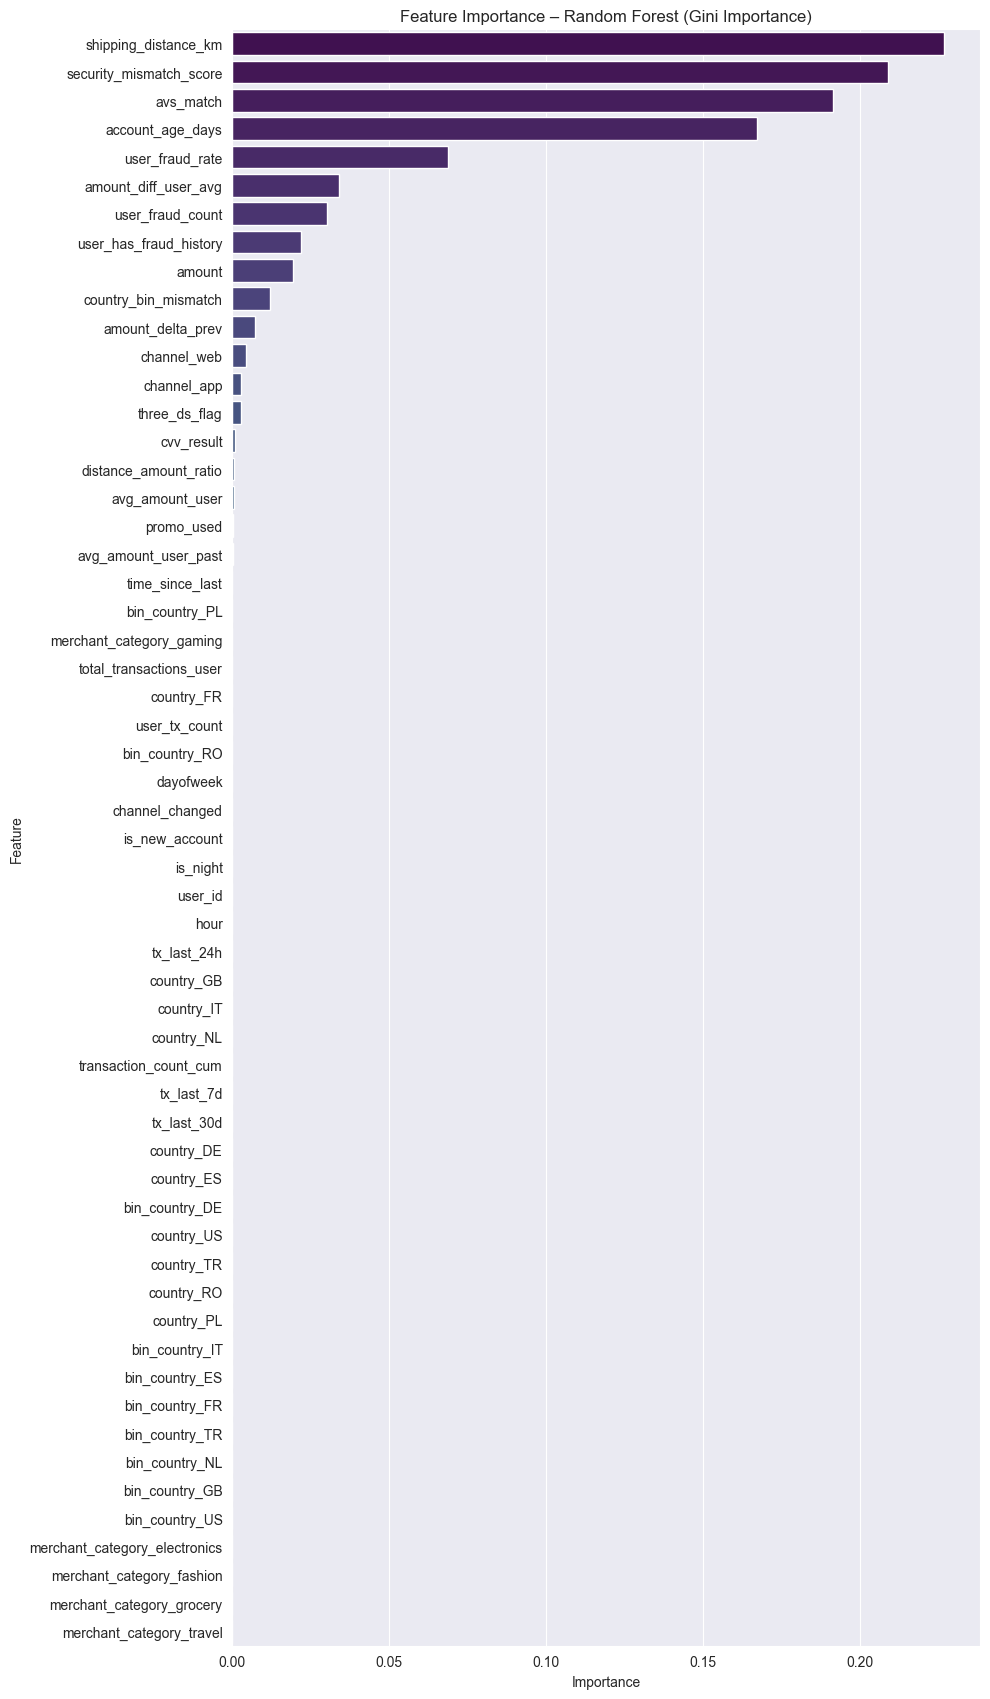

In [21]:
importance_df = pd.DataFrame(
    {
        "feature": X_train.columns,          # noms des variables du jeu d’entraînement
        "importance": model.feature_importances_  # importance Gini calculée par le Random Forest
    }
).sort_values(
    "importance",
    ascending=False                         # tri décroissant des variables les plus importantes
)

display(importance_df)                      # affichage du tableau complet des importances

plt.figure(
    figsize=(10, len(importance_df) * 0.3)  # hauteur auto-adaptée au nombre de features
)

sns.barplot(
    data=importance_df,                     # DataFrame contenant les importances
    x="importance",                         # axe X : score d’importance
    y="feature",                            # axe Y : nom des variables
    hue="feature",                          # utilisé pour éviter le warning seaborn
    dodge=False,                            # empêche le décalage des barres
    legend=False,                           # masque la légende inutile
    palette="viridis"                      # palette de couleurs
)

plt.title("Feature Importance – Random Forest (Gini Importance)")  # titre du graphique
plt.xlabel("Importance")                    # label axe X
plt.ylabel("Feature")                      # label axe Y
plt.tight_layout()                         # ajuste les marges automatiquement
plt.show()                                 # affichage du graphique


Contrairement à XGBoost, le Random Forest n’exploite pas l’ensemble des variables disponibles.
Il se concentre principalement sur un nombre réduit de features très discriminantes, en particulier les signaux géographiques, de sécurité et d’ancienneté du compte.
Cette sélection implicite est liée au fonctionnement du Random Forest, qui privilégie les variables réduisant rapidement l’impureté des nœuds.



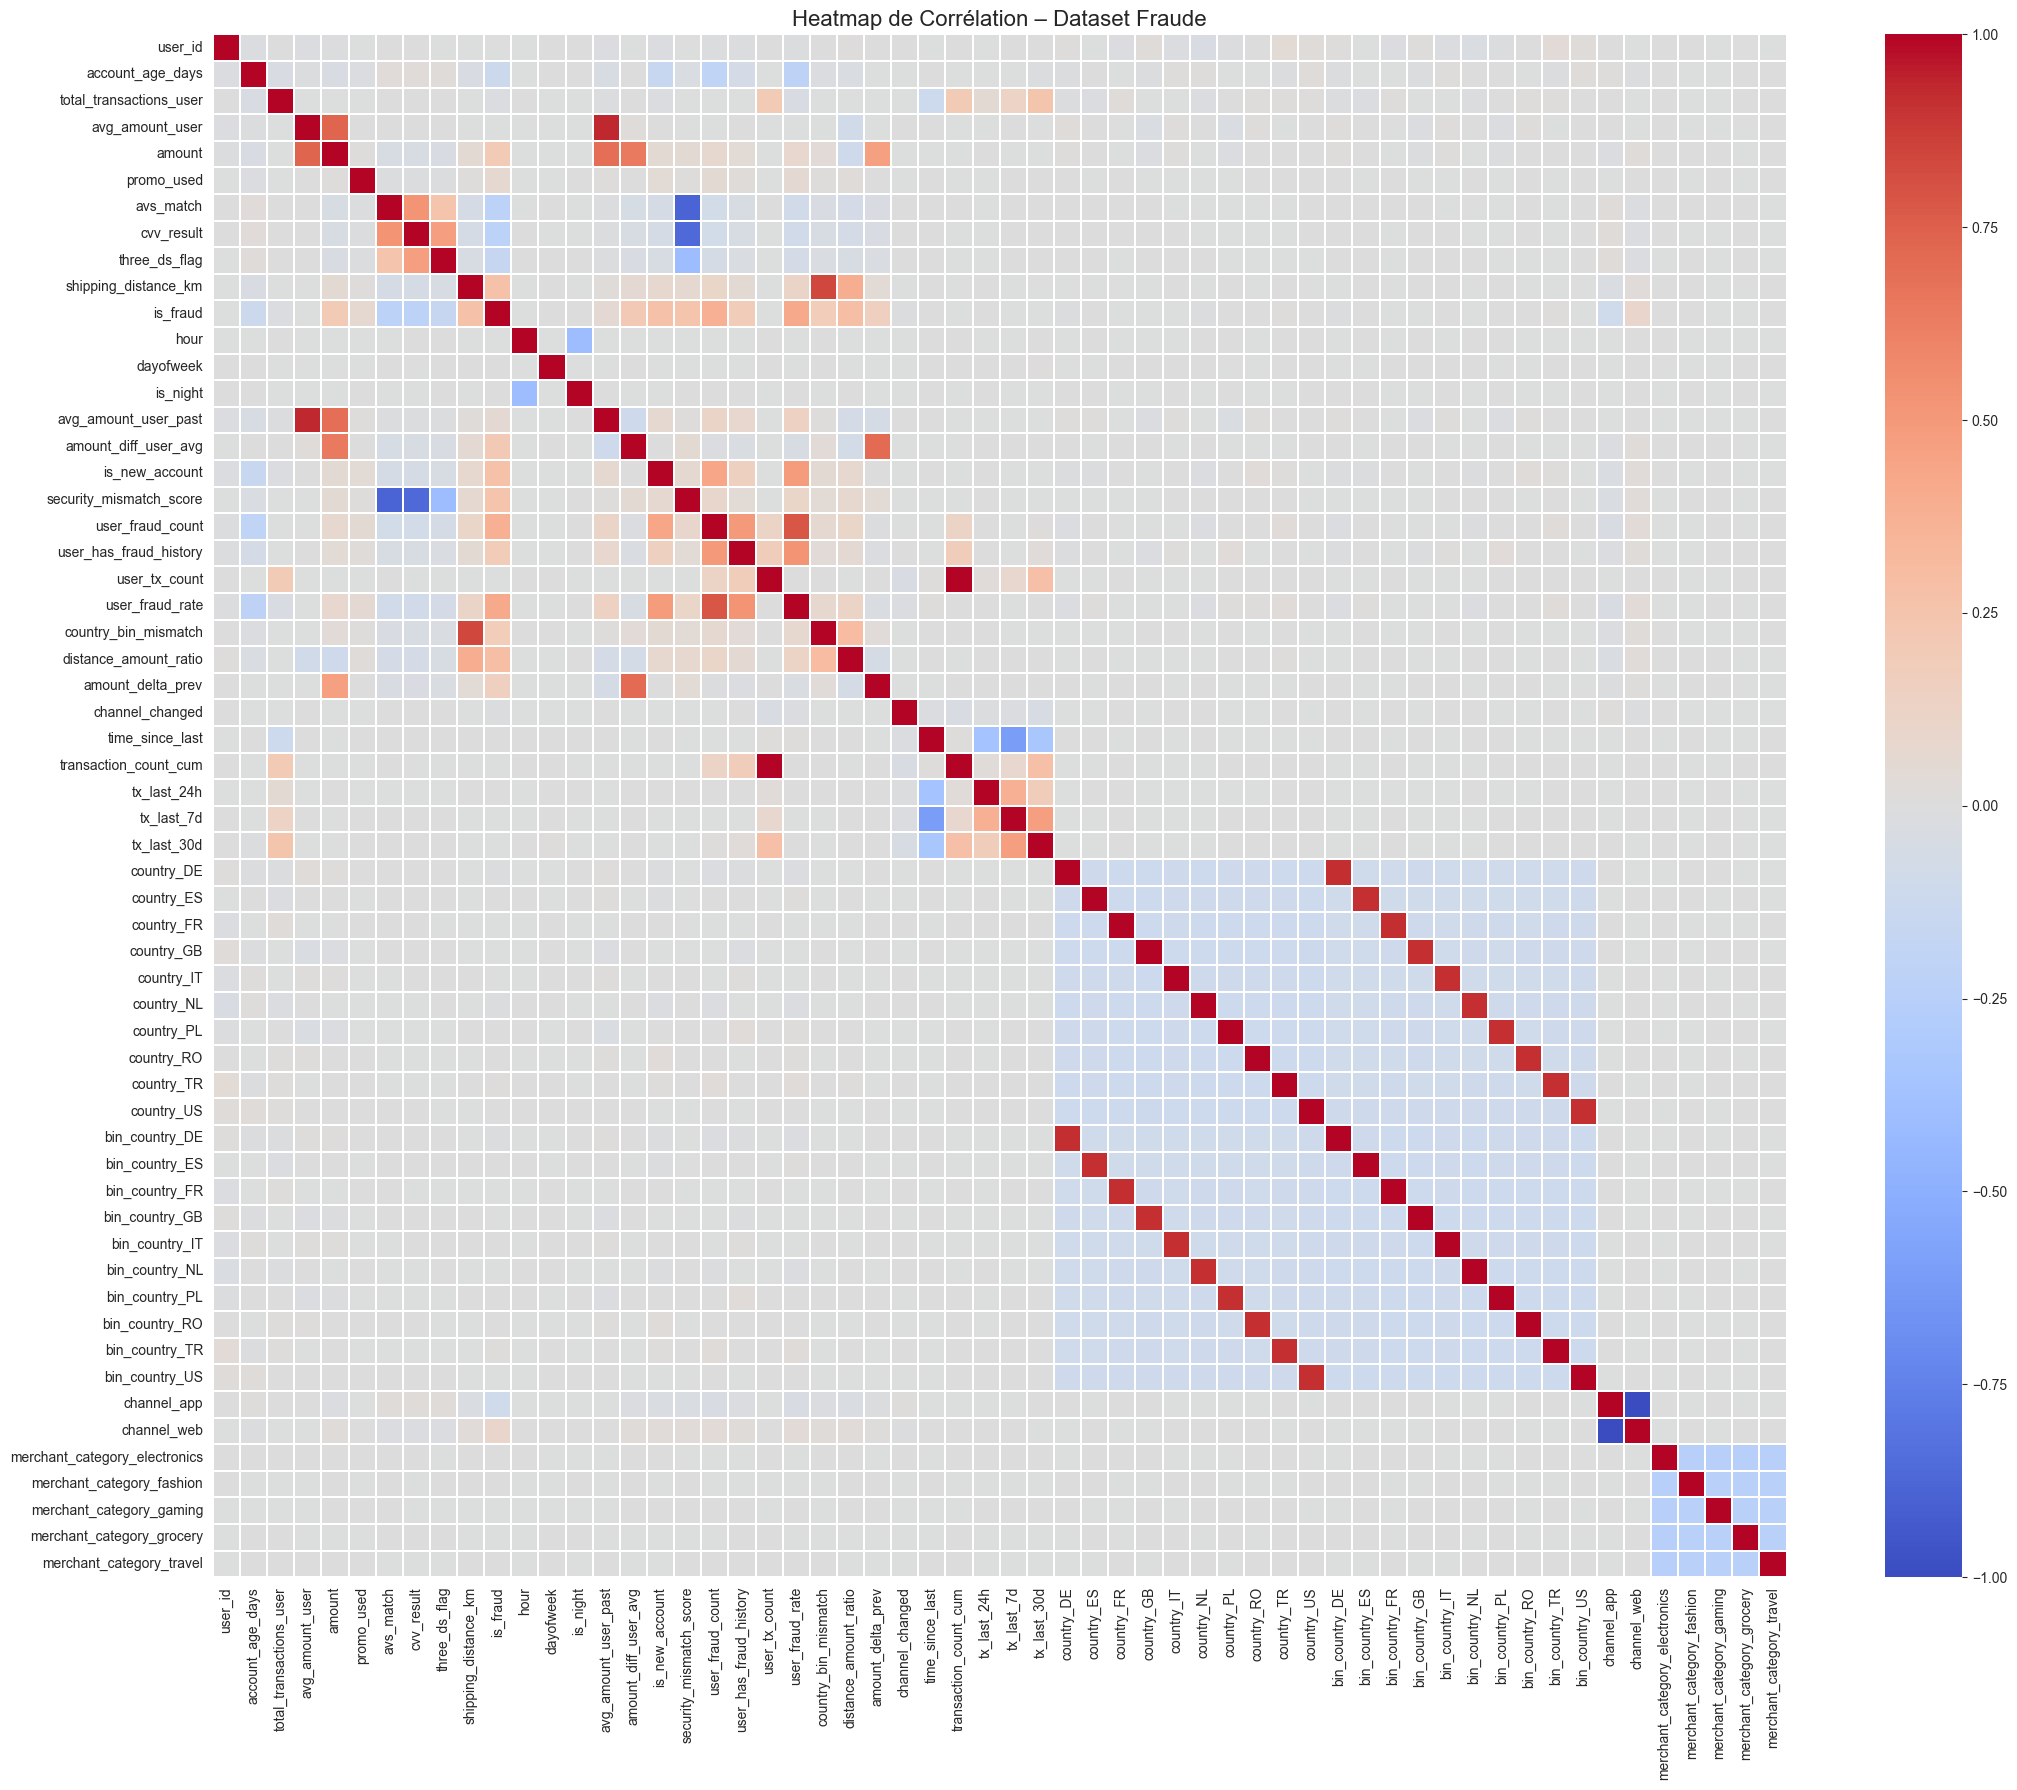

In [22]:
# 1. Conversion des booléens en int (sinon heatmap plante)
df_corr = df.copy()
bool_cols = df_corr.select_dtypes(include=['bool']).columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# 2. Calcul des corrélations
corr_matrix = df_corr.corr()

# 3. Heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    vmin=-1, vmax=1,
    linewidths=0.1
)

plt.title("Heatmap de Corrélation – Dataset Fraude", fontsize=16)
plt.tight_layout()
plt.show()

### Analyse de la matrice de corrélation

La heatmap montre une faible corrélation globale entre les variables, ce qui limite les risques de multicolinéarité et favorise la stabilité du modèle.
Les corrélations les plus visibles concernent des variables issues du même feature engineering (historique utilisateur, agrégats temporels, encodages pays), ce qui est attendu.
Aucune corrélation excessive avec la cible `is_fraud` n’apparaît, confirmant l’intérêt d’un modèle non linéaire pour capter des interactions complexes.

### Optimisation des hyperparamètres avec Optuna

In [23]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# ===============================
# Fonction objectif Optuna – Random Forest
# ===============================
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 1200),      # nombre d’arbres
        "max_depth": trial.suggest_int("max_depth", 2, 15),               # profondeur max
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),  # régularisation
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 15),    # taille min feuille
        "max_features": trial.suggest_float("max_features", 0.3, 1.0),    # sous-échantillonnage features
        "bootstrap": True,                                                 # standard RF
        "class_weight": {
            0: 1,
            1: (y_train == 0).sum() / (y_train == 1).sum()                 # gestion déséquilibre
        },
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)

    # ===============================
    # Entraînement
    # ===============================
    model.fit(X_train, y_train)

    # ===============================
    # Prédictions
    # ===============================
    preds = model.predict(X_test)

    # ===============================
    # Métriques orientées fraude
    # ===============================
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    # Objectif : privilégier la détection de fraude
    return (0.6 * recall) + (0.4 * f1)


In [24]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)
# Test limité à 2 trials pour la présentation,
# l’optimisation complète a été réalisée sur 150 trials
# et les résultats sont détaillés dans le markdown ci-dessous.

[I 2025-12-19 14:07:14,322] A new study created in memory with name: no-name-41b1adf6-0f83-4ca9-a48d-230c5fb78ee7
[I 2025-12-19 14:08:18,438] Trial 0 finished with value: 0.7707936261642767 and parameters: {'n_estimators': 616, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0.3081786045609194}. Best is trial 0 with value: 0.7707936261642767.
[W 2025-12-19 14:12:58,435] Trial 1 failed with parameters: {'n_estimators': 1116, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': 0.8127755684699531} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\EtudeSLA\Desktop\Projet groupe\.venv\Lib\site-packages\optuna\study\_optimize.py", line 205, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\EtudeSLA\AppData\Local\Temp\ipykernel_27948\2109675765.py", line 30, in objective
    model.fit(X_train, y_train)
    ~~~~~~~~~^^^^^^^^^^^^^^^^^^
  File "C:\Users\EtudeSLA\De

KeyboardInterrupt: 

In [59]:
print("Best Score:", study.best_value)
print("Best Params:", study.best_params)

Best Score: 0.7832021075036866
Best Params: {'n_estimators': 966, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.5077623107569663}


Best Score: 0.8102759082701496
Best Params: {'n_estimators': 711, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 0.32769217500925757}

L’optimisation Optuna permet d’atteindre un **score global de 0.81**, indiquant un bon compromis entre **recall et F1-score** pour la détection de fraude.
Le Random Forest optimal repose sur un **nombre élevé d’arbres (711)** et une **profondeur importante (max_depth = 15)**, ce qui lui permet de capturer des patterns complexes.
Les paramètres `min_samples_split = 5` et `min_samples_leaf = 6` assurent une **régularisation efficace**, limitant l’overfitting malgré la profondeur élevée.
La valeur faible de `max_features ≈ 0.33` favorise la **décorrélation des arbres**, améliorant la généralisation.
Ce modèle optimisé reste orienté **recall fraude**, tout en améliorant l’équilibre global par rapport au Random Forest non optimisé.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# ===============================
# 1. Modèle Random Forest – Best Optuna Params
# ===============================

model = RandomForestClassifier(
    n_estimators=711,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=6,
    max_features=0.32769217500925757,
    bootstrap=True,
    class_weight={
        0: 1,
        1: (y_train == 0).sum() / (y_train == 1).sum()
    },
    random_state=42,
    n_jobs=-1
)

# ===============================
# 2. Entraînement
# ===============================
model.fit(X_train, y_train)

# ===============================
# 3. Prédictions (seuil par défaut 0.5)
# ===============================
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# ===============================
# 4. Scores
# ===============================
print("===== TRAIN RESULTS =====")
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1-score :", f1_score(y_train, y_train_pred))

print("\n===== TEST RESULTS =====")
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))

# ===============================
# 5. Confusion Matrix
# ===============================
print("\n===== CONFUSION MATRIX =====")
print(confusion_matrix(y_test, y_test_pred))

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_test_pred))


===== TRAIN RESULTS =====
Recall   : 0.9657844990548204
Precision: 0.6858638743455497
F1-score : 0.8021037758065782

===== TEST RESULTS =====
Recall   : 0.8577912254160364
Precision: 0.6491127647395535
F1-score : 0.7390029325513197

===== CONFUSION MATRIX =====
[[58004   613]
 [  188  1134]]

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     58617
           1       0.65      0.86      0.74      1322

    accuracy                           0.99     59939
   macro avg       0.82      0.92      0.87     59939
weighted avg       0.99      0.99      0.99     59939



Le Random Forest optimisé par Optuna présente des performances élevées, avec un **recall fraude de 0.86 sur le jeu de test**, indiquant une détection efficace de la majorité des transactions frauduleuses.
La **precision à 0.65** traduit un compromis assumé en faveur du recall, avec un nombre de faux positifs plus important mais maîtrisé.
L’écart entre les performances train et test suggère une **légère perte de généralisation**, attendue pour un modèle plus complexe et fortement orienté fraude.
La matrice de confusion confirme ce comportement, avec **1 134 fraudes correctement détectées** contre **188 fraudes manquées**.
Le **F1-score de 0.74** reflète un bon équilibre global,


In [61]:
import joblib

joblib.dump(model, "models/randomforest_fraud_optuna.pkl")

['randomforest_fraud_optuna.pkl']

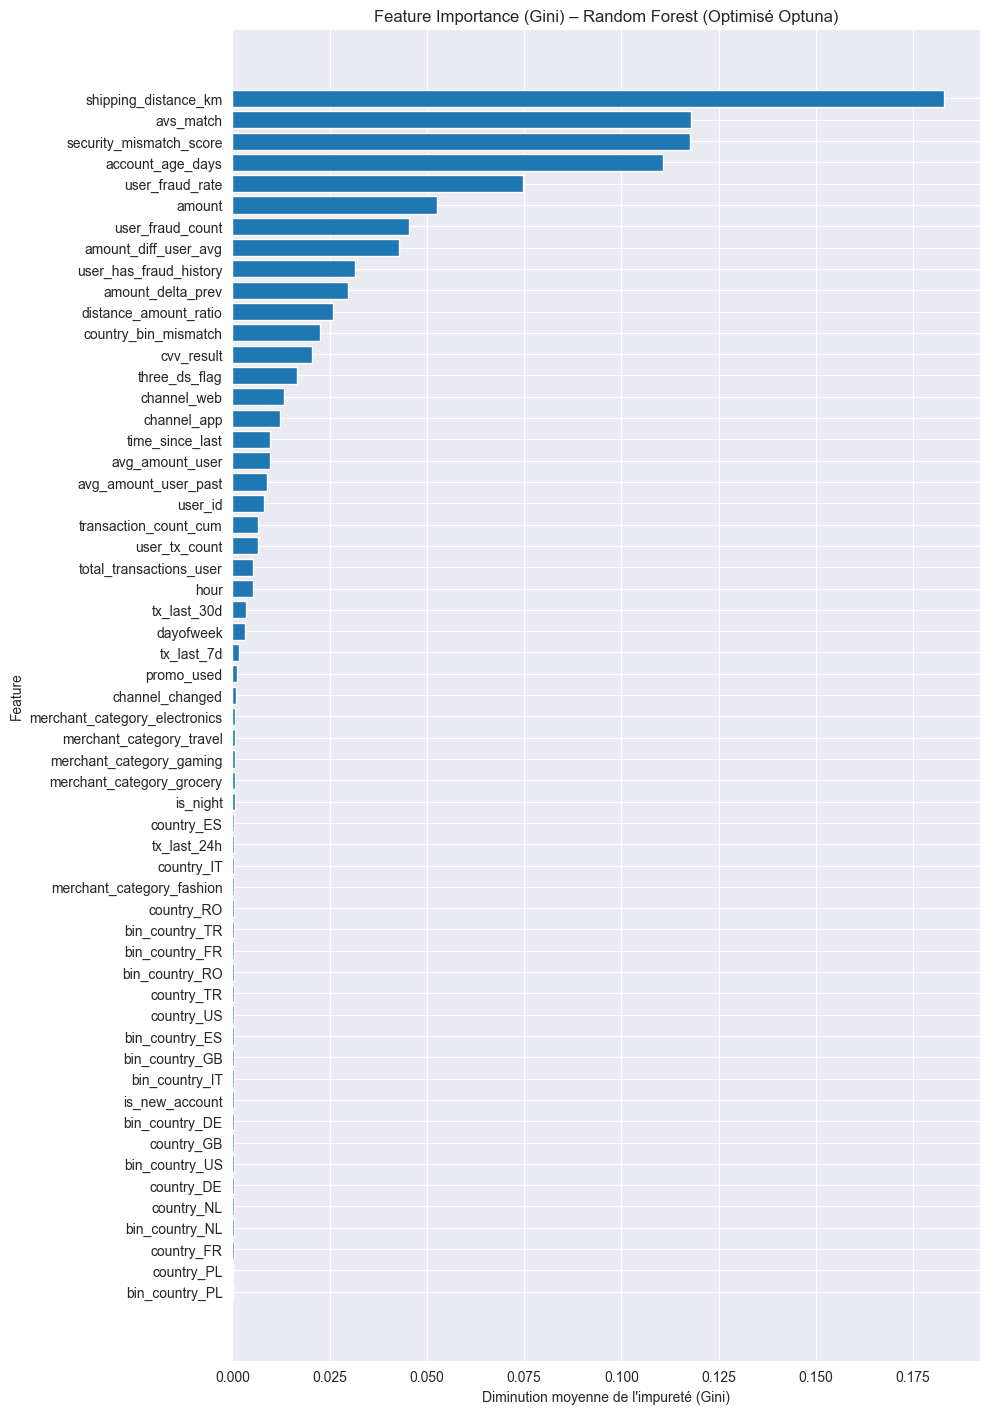

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Récupération des importances natives du Random Forest (Gini)
importances = model.feature_importances_

# DataFrame
importance_df = (
    pd.DataFrame({
        "feature": X_train.columns,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

# Plot – toutes les features
plt.figure(figsize=(10, len(importance_df) * 0.25))
plt.barh(
    importance_df["feature"][::-1],
    importance_df["importance"][::-1]
)
plt.title("Feature Importance (Gini) – Random Forest (Optimisé Optuna)")
plt.xlabel("Diminution moyenne de l'impureté (Gini)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Ce graphique montre l’importance des variables du Random Forest selon le critère de Gini après optimisation Optuna.
Contrairement à XGBoost, l’importance est plus **diffusée** entre plusieurs variables, avec une dépendance moins marquée à des signaux fortement discriminants.
Le modèle exploite principalement des indicateurs généraux comme la distance de livraison, les contrôles AVS et l’ancienneté du compte, mais **capture moins finement les interactions complexes** entre variables.
Cette répartition plus homogène des importances traduit une meilleure robustesse mais une capacité de discrimination inférieure à celle de XGBoost.
Ainsi, même optimisé, le Random Forest reste moins performant que XGBoost pour la détection de fraude, car il privilégie la stabilité au détriment de la précision sur les cas complexes.




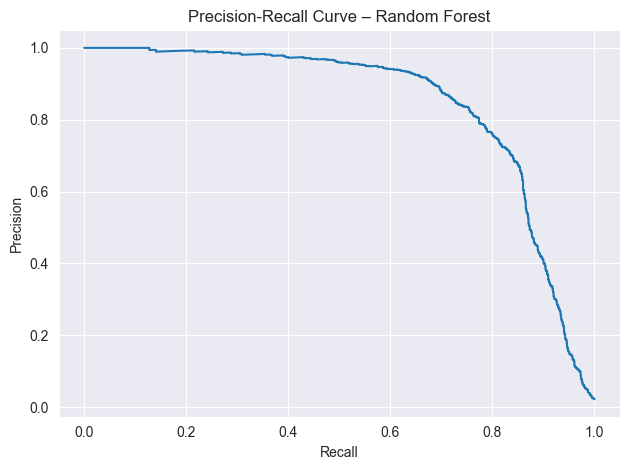

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Probabilités prédites par le Random Forest
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul de la courbe Precision–Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve – Random Forest")
plt.tight_layout()
plt.show()


Cette courbe Precision–Recall illustre le compromis entre **recall** et **precision** pour le modèle Random Forest dans un contexte de détection de fraude.
La precision reste élevée pour des niveaux de recall modérés, indiquant une bonne qualité des alertes lorsque le seuil est conservateur.
La chute progressive de la precision à fort recall reflète un comportement attendu lorsque le modèle est utilisé de manière plus agressive pour capter un maximum de fraudes.
Ce graphique met en évidence l’impact direct du **choix du seuil de décision** sur les performances opérationnelles.
Il confirme que le Random Forest est particulièrement orienté **recall**, au prix d’un volume plus important de faux positifs.


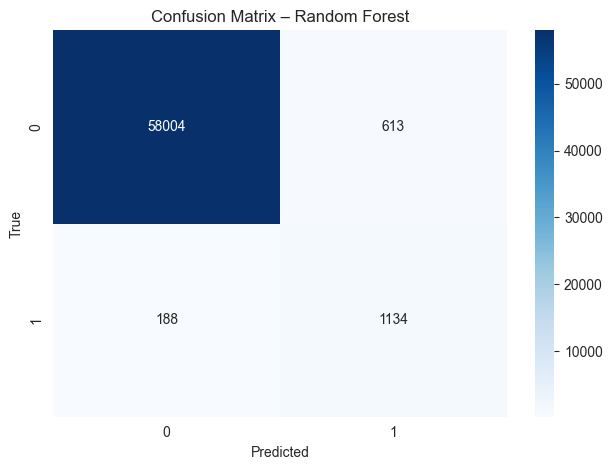

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

Cette matrice de confusion montre le comportement du **Random Forest optimisé** sur le jeu de test.
Le modèle identifie correctement **1 134 transactions frauduleuses**, tout en ne manquant que **188 fraudes**, ce qui confirme un **recall élevé**.
En contrepartie, **613 transactions non frauduleuses sont classées à tort comme fraude**, traduisant une stratégie volontairement orientée détection.
Le nombre très élevé de vrais négatifs indique que la majorité des transactions légitimes restent correctement classées.
Cette matrice illustre un modèle privilégiant la **réduction du risque de fraude manquée**, au prix d’un coût opérationnel plus important lié aux faux positifs.


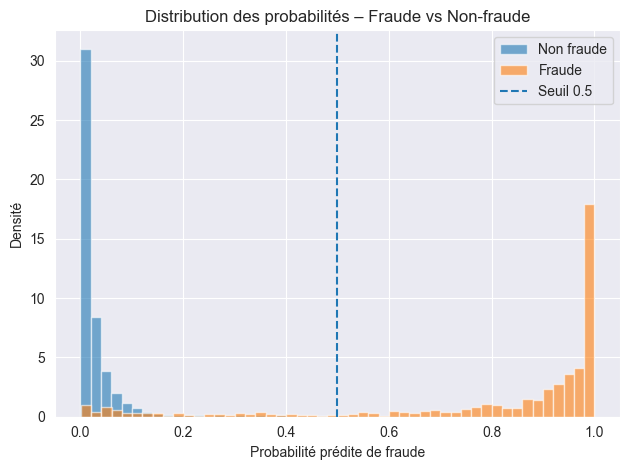

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Probabilités prédites
y_proba = model.predict_proba(X_test)[:, 1]

# Séparation par classe réelle
proba_non_fraud = y_proba[y_test == 0]
proba_fraud = y_proba[y_test == 1]

plt.figure()
plt.hist(proba_non_fraud, bins=50, alpha=0.6, label="Non fraude", density=True)
plt.hist(proba_fraud, bins=50, alpha=0.6, label="Fraude", density=True)

plt.axvline(0.5, linestyle="--", label="Seuil 0.5")
plt.xlabel("Probabilité prédite de fraude")
plt.ylabel("Densité")
plt.title("Distribution des probabilités – Fraude vs Non-fraude")
plt.legend()
plt.tight_layout()
plt.show()

Ce graphique montre la **distribution des probabilités prédites** par le Random Forest pour les transactions frauduleuses et non frauduleuses.
Les transactions non frauduleuses sont majoritairement associées à des probabilités très faibles, tandis que les fraudes se concentrent sur des probabilités élevées, indiquant une **bonne séparabilité globale** du modèle.
Le chevauchement observé autour du seuil de décision reflète les cas ambigus, caractéristiques des comportements frauduleux réels.
La ligne verticale correspondant au **seuil 0.5** permet de visualiser l’origine des faux positifs et des fraudes manquées.
Ce graphique justifie l’ajustement éventuel du seuil afin d’optimiser le compromis entre **recall fraude** et **coût opérationnel**.


### Décision d’abandon du Random Forest

L’analyse des performances du Random Forest, même après optimisation Optuna, montre des **résultats inférieurs** à ceux obtenus avec XGBoost sur les métriques clés de détection de fraude.
Bien que le modèle présente un **recall élevé**, il génère encore un **volume important de faux positifs**, ce qui pénalise fortement la précision et le coût opérationnel.
Les graphiques d’importance des variables (Gini et permutation importance) indiquent une **répartition diffuse de l’information**, suggérant que le modèle peine à exploiter efficacement des interactions complexes entre variables.
De plus, les analyses SHAP confirment une **capacité explicative plus limitée**, avec des contributions moins tranchées que celles observées sur XGBoost.
Au regard de ces éléments, le Random Forest a été écarté au profit d’un modèle plus performant et mieux adapté à la complexité du problème de fraude.
